In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from scipy import stats as st
import matplotlib as mpl
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_data = "/content/drive/MyDrive/หลักสูตรการวิเคราะห์ผู้่บริโภค/data_final_project.csv"   #path file
data = pd.read_csv(path_data).drop(["CODE", "ค่าแรง", "วันที่ลาออก", "Year", "Month", "Day", "Quarter", "เหตุผล", "อายุงาน(วัน)"], axis=1)   #อ่านไฟล์ข้อมูล csv

print("shape of data :", data.shape)   #ดูขนาดของชุดข้อมูล
print("---sum null---\n", data.isnull().sum())   #ดูว่ามีข้อมูลที่เป็น null มั้ย

shape of data : (240, 9)
---sum null---
 ตำแหน่ง/แผนก      0
เพศ               0
วุฒิ              0
ศาสนา             0
สัญชาติ           0
อายุ              0
อายุงาน(เดือน)    0
อายุงาน(ปี)       0
สถานะ (groups)    0
dtype: int64


In [ ]:
print(data.columns)   #ดูว่ามีคอลัมน์ชื่ออะไรบ้าง
print("\n\n---describe data---\n", data.describe())   #ดูค่าต่างๆทางสถิติของตัวแปรที่เป็นเชิงปริมาณ

Index(['ตำแหน่ง/แผนก', 'เพศ', 'วุฒิ', 'ศาสนา', 'สัญชาติ', 'อายุ',
       'อายุงาน(เดือน)', 'อายุงาน(ปี)', 'สถานะ (groups)'],
      dtype='object')


---describe data---
              อายุ  อายุงาน(เดือน)  อายุงาน(ปี)
count  240.000000      240.000000    240.00000
mean    33.400000        4.583333      2.81250
std      9.749498        3.415650      4.00134
min     17.000000        0.000000      0.00000
25%     26.000000        2.000000      0.00000
50%     31.000000        4.000000      1.00000
75%     40.250000        7.000000      4.00000
max     65.000000       11.000000     19.00000


#test

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf   #ติดตั้ง font ไทย
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New', size=20)

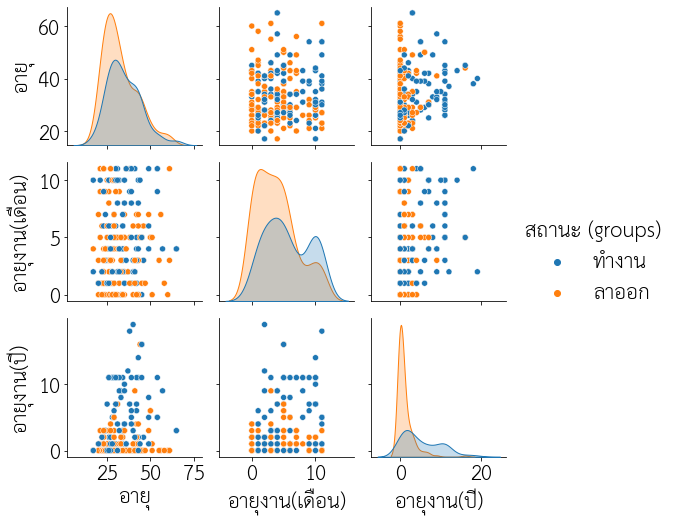

In [ ]:
sns.pairplot(data, hue='สถานะ (groups)')   #พลอตความสัมพันธ์ของแต่ละตัวแปร

#Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.get_dummies(data, columns=["ตำแหน่ง/แผนก", "เพศ", "วุฒิ", "ศาสนา", "สัญชาติ", 'สถานะ (groups)'], drop_first=True)   #ทำตัวแปรเชิงคุณภาพต่างๆ ให้เป็นเชิงคุณภาพ โดยสร้างเป็นตัวแปรดัมมี่

In [ ]:
data

,อายุ,อายุงาน(เดือน),อายุงาน(ปี),ตำแหน่ง/แผนก_milling,ตำแหน่ง/แผนก_กลึง,ตำแหน่ง/แผนก_การตลาด,ตำแหน่ง/แผนก_ขับรถส่งของ,ตำแหน่ง/แผนก_คิวซี,ตำแหน่ง/แผนก_ตกแต่ง,ตำแหน่ง/แผนก_สโตร์,...,วุฒิ_ป.ตรี,วุฒิ_ปวช,วุฒิ_ปวช.,วุฒิ_ปวส.,วุฒิ_ม.3,วุฒิ_ม.6,สัญชาติ_พม่า,สัญชาติ_ลาว,สัญชาติ_ไทย,สถานะ (groups)_ลาออก
0,45,5,16,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,44,5,16,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,45,5,16,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,38,11,18,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,43,8,11,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,27,5,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
236,43,4,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
237,17,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
238,25,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X = data.drop(['สถานะ (groups)_ลาออก'], axis=1)   #สร้าง feature ที่จะเอาไป train โดยเอาทุกคอลัมน์ของ data ยกเว้นคอลัมน์ สถานะ
y = data['สถานะ (groups)_ลาออก']   #เอา สถานะ เป็น target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)   #เเบ่ง train-test

#model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

SVM

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("accuracy :", accuracy_score(y_test, y_pred))

accuracy : 0.7291666666666666


RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("accuracy :", accuracy_score(y_test, y_pred))

accuracy : 0.7708333333333334


GradientBoostingClassification

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=32)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("accuracy :", accuracy_score(y_test, y_pred))

accuracy : 0.7708333333333334


linearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
for i, y in enumerate(y_pred):   #ถ้าค่าที่ออกมาจาก model มีค่ามากกว่า 0.5 (threshold) ให้เปลี่ยนค่าเป็น 1 ถ้าน้อยกว่า 0.5 (threshold) ให้เปลี่ยนเป็น 0 เพื่อที่จะได้นำไปเปรียบเทียบกับตัว y_test ได้
  if i > 0.5:
    y_pred[i] = 1
  else:
    y_pred[i] = 0

In [ ]:
accuracy_score(y_test, y_pred)

0.6041666666666666